<a href="https://colab.research.google.com/github/fnfnsirin/bootcamp_projects/blob/main/HW2_3_Essential_Python_for_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Planets of Star Wars API
scrape and build a dataframe. 🌍🌌💫

In [ ]:
import requests 
import time
import pandas as pd 

In [ ]:
#Check Status code 200
avalible_api =[]
for i in range(0,101):
    url = f"https://swapi.dev/api/planets/{i}"
    #get requests
    response = requests.get(url)
    #check status code
    if response.status_code==200:
      avalible_api.append(i)
    else:pass

In [ ]:
avalible_api

In [ ]:
names = []
rotation_periods = []
orbital_periods = []
diameters = []
climates = []
gravitys = []
terrains = []
surface_waters = []
populations = []

for i in avalible_api:
    url = f"https://swapi.dev/api/planets/{i}"
    resp = requests.get(url)
    result = resp.json()
    names.append(result['name'])
    rotation_periods.append(result['rotation_period'])
    orbital_periods.append(result['orbital_period'])
    diameters.append(result['diameter'])
    climates.append(result['climate'])
    gravitys.append(result['gravity'])
    terrains.append(result['terrain'])
    surface_waters.append(result['surface_water'])
    populations.append(result['population'])

    time.sleep(1)

df_planets = pd.DataFrame({
    "name": names, 
    "rotation_period": rotation_periods, 
    "orbital_period": orbital_periods,
    "diameter": diameters,
    "climate": climates,
    "gravity": gravitys,
    "terrain": terrains,
    "surface_water": surface_waters,
    "population": populations,
})

df_planets.head(10)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown
5,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000
6,Endor,18,402,4900,temperate,0.85 standard,"forests, mountains, lakes",8,30000000
7,Naboo,26,312,12120,temperate,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000
8,Coruscant,24,368,12240,temperate,1 standard,"cityscape, mountains",unknown,1000000000000
9,Kamino,27,463,19720,temperate,1 standard,ocean,100,1000000000


### Most of the population lives on the Coruscant planet in a temperate climate. 🌎

In [ ]:
result = df_planets.query(" population!='unknown' ")

In [ ]:
#Convert String to Int
result['population']=result['population'].astype(str).astype(int).sort_values(ascending=False)

In [ ]:
result.groupby(['climate','name'])['population'].sum().sort_values(ascending=False).reset_index()

,climate,name,population
0,temperate,Coruscant,1000000000000
1,temperate,Skako,500000000000
2,"temperate, arid",Geonosis,100000000000
3,temperate,Mon Cala,27000000000
4,polluted,Eriadu,22000000000
5,superheated,Sullust,18500000000
6,temperate,Nal Hutta,7000000000
7,temperate,Muunilinst,5000000000
8,temperate,Naboo,4500000000
9,"arid, temperate, tropical",Kalee,4000000000


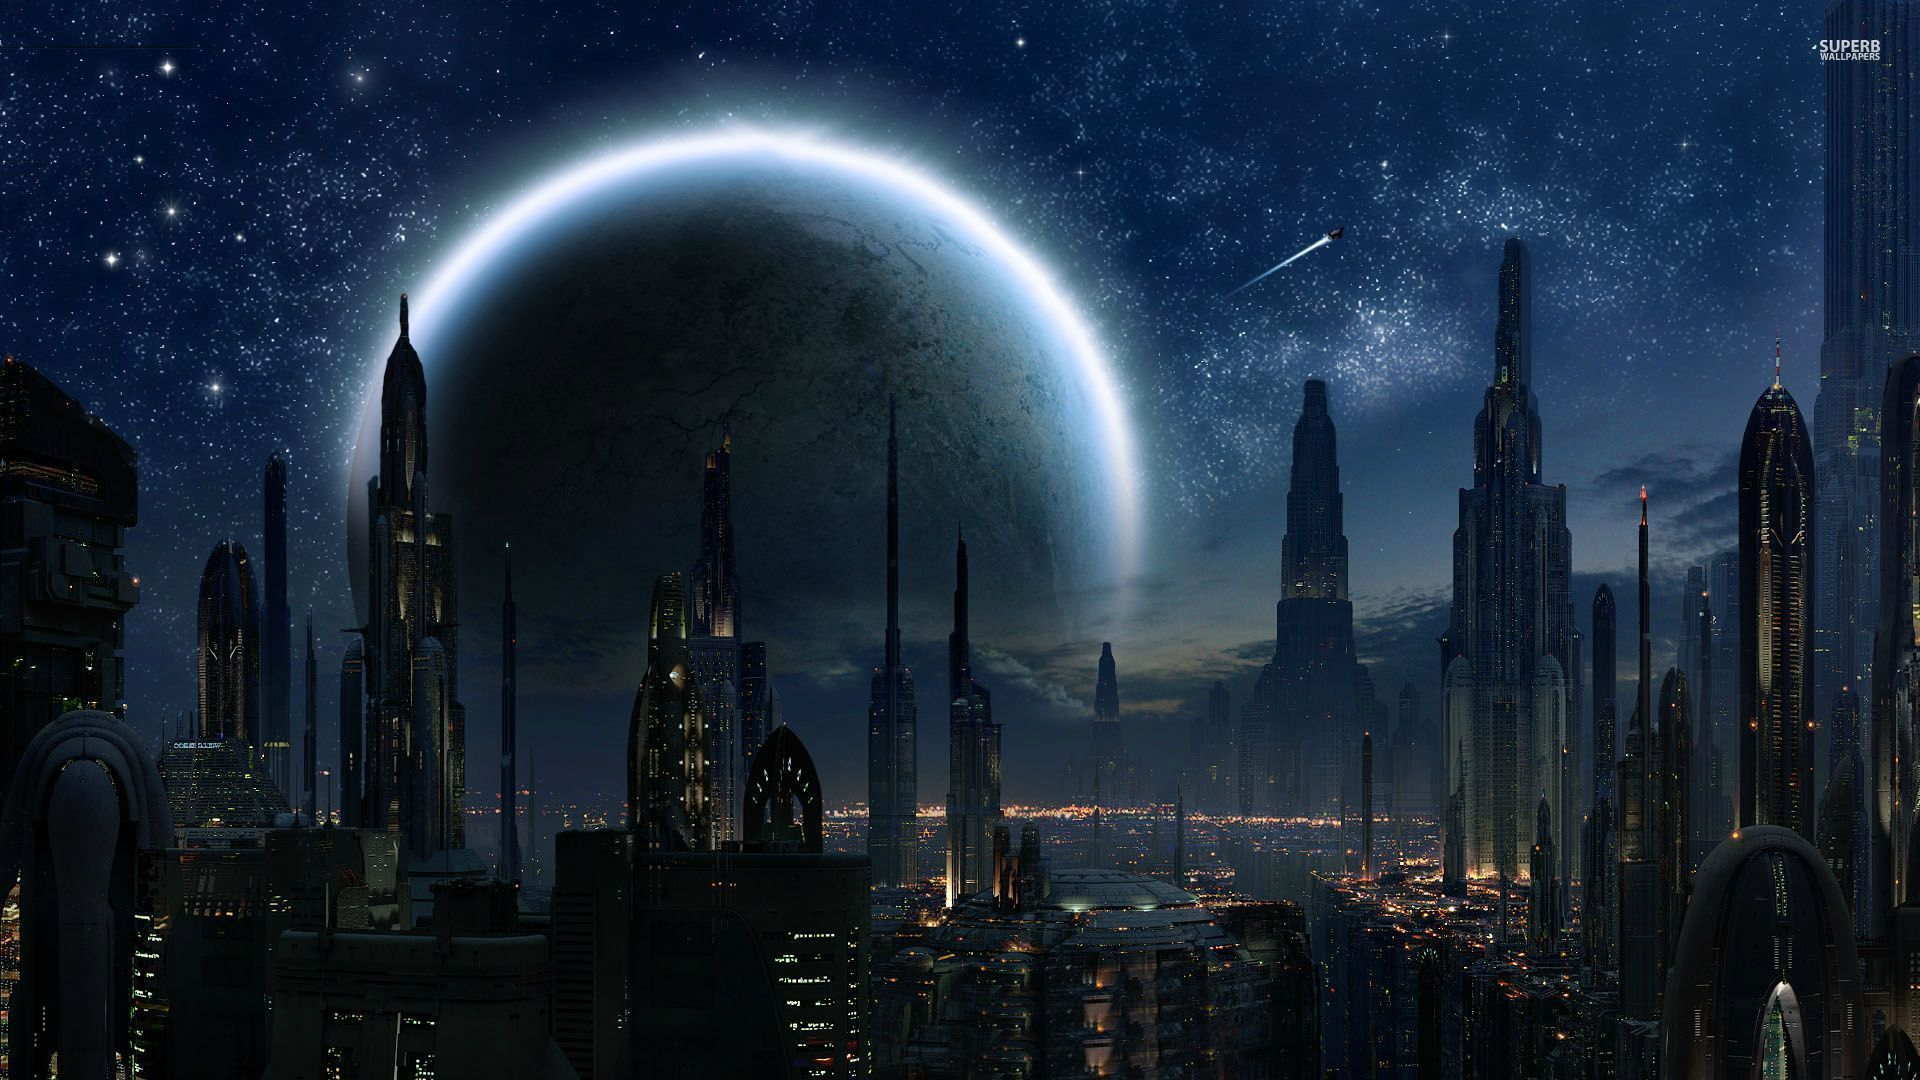

# Build simple ML model using Regression/ Classification sklearn 📈

dataset BreastCancer in R download to csv file.🎗

#### Read Data

In [ ]:
# linear regression
# sklearn basics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

# read data
BreastCancer = pd.read_csv("BreastCancer.csv")
BreastCancer.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
BreastCancer.tail()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant
698,699,897471,4,8,8,5,4,5.0,10,4,1,malignant


In [ ]:
BreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [ ]:
(BreastCancer.isna().sum()).sort_values(ascending=False)

Bare.nuclei        16
Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [ ]:
clean_data = BreastCancer.dropna()
clean_data #683 rows

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [ ]:
import numpy as np
#Class_group benign = 0, malignant = 1
clean_data['Class_group']=np.where(clean_data['Class']=='malignant',1,0)

In [ ]:
clean_data

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,Class_group
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign,0
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign,0
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign,0
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign,0
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign,0
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign,0
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant,1
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant,1


### Split Data

In [ ]:
# prepare data
X = clean_data.drop(["Unnamed: 0","Id","Class", "Class_group"], axis=1)
y = clean_data["Class_group"]

# split data
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.30, random_state = 99 #set.seed()
)

In [ ]:
X_train.shape

(478, 9)

### Predicted data/ Scoring

In [ ]:
#LogisticRegression
# train model
scaler = StandardScaler()
lr = LogisticRegression()
model = Pipeline([('standardize', scaler),('log_reg', lr)])
model.fit(X_train, y_train)

# test model
y_predicted = model.predict(X_train)
y_predicted_probs = model.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_predicted)*100
test_auc_roc = roc_auc_score(y_train, y_predicted_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_predicted))
print('Training accuracy: %.2f %%' % train_accuracy)

Confusion matrix:
 [[296   6]
 [  5 171]]
Training accuracy: 97.70 %


### Model Evaluation

In [ ]:
y_test_predicted = model.predict(X_test)
y_test_predicted_probs = model.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_predicted)*100
test_auc_roc = roc_auc_score(y_test, y_test_predicted_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_predicted))
print('Testing accuracy: %.2f %%' % test_accuracy) 

Confusion matrix:
 [[139   3]
 [  6  57]]
Testing accuracy: 95.61 %


#### Confusion Matrix between train and test data of Breast Cancer (1 = Malignant, 0 = Benign)

In [ ]:
#Train data (70%)
print(classification_report(y_train, y_predicted, digits=4, target_names=['Benign 0','Malignant 1']))

              precision    recall  f1-score   support

    Benign 0     0.9834    0.9801    0.9818       302
 Malignant 1     0.9661    0.9716    0.9688       176

    accuracy                         0.9770       478
   macro avg     0.9747    0.9759    0.9753       478
weighted avg     0.9770    0.9770    0.9770       478



In [ ]:
#Test data (30%)
print(classification_report(y_test, y_test_predicted, digits=4, target_names=['Benign 0','Malignant 1']))

              precision    recall  f1-score   support

    Benign 0     0.9586    0.9789    0.9686       142
 Malignant 1     0.9500    0.9048    0.9268        63

    accuracy                         0.9561       205
   macro avg     0.9543    0.9418    0.9477       205
weighted avg     0.9560    0.9561    0.9558       205



In [ ]:
accuracy = ["precision","recall","f1-score","accuracy"]
train_acc_malignant = []
test_acc_malignant = []
a=[]
b=[]
a=classification_report(y_train, y_predicted, digits=4)
b=classification_report(y_test, y_test_predicted, digits=4)
a=a.split()
b=b.split()
train_acc_malignant=a[10:13]
test_acc_malignant=b[10:13]

In [ ]:
train_acc_malignant = [eval(x) for x in train_acc_malignant]
test_acc_malignant= [eval(x) for x in test_acc_malignant]

In [ ]:
#.append(accuracy)
train_acc_malignant.append(accuracy_score(y_train, y_predicted))

In [ ]:
#.append(accuracy)
test_acc_malignant.append(accuracy_score(y_test, y_test_predicted))

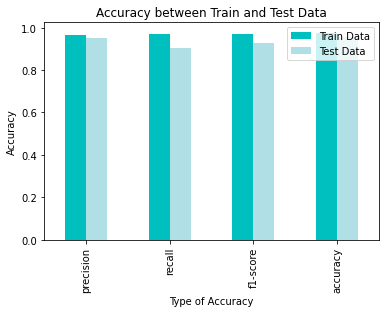

In [359]:
df = pd.DataFrame({
    "Accuracy": accuracy,
    "Train Data": train_acc_malignant,
    "Test Data":test_acc_malignant})

df.plot(kind='bar',color=['c','powderblue'],x="Accuracy",
        title='Accuracy between Train and Test Data',
        xlabel = 'Type of Accuracy',
        ylabel ='Accuracy');


In [ ]:
df

,Accuracy,Train Data,Test Data
0,precision,0.966100,0.950000
1,recall,0.971600,0.904800
2,f1-score,0.968800,0.926800
3,accuracy,0.976987,0.956098
